# Problem Statement

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#!pip install pandas==0.20.0

In [3]:
# get the feature from the file features.txt
features = list()
with open("C:/Users/adity/Downloads/applied ai projects/HumanActivityRecognition/HAR/UCI_HAR_Dataset/features.txt") as f:
    features = [line.split()[1] for line in f.readlines()]
print("Number of Features : {}".format(len(features)))

Number of Features : 561


# Get the train data

In [4]:
# get the data from text file to the pandas dataframe
X_train = pd.read_csv("C:/Users/adity/Downloads/applied ai projects/HumanActivityRecognition/HAR/UCI_HAR_Dataset/train/X_train.txt", delim_whitespace = True, header = None)
X_train.columns = features

#add subject column to the dataframe
X_train['subject'] = pd.read_csv("C:/Users/adity/Downloads/applied ai projects/HumanActivityRecognition/HAR/UCI_HAR_Dataset/train/subject_train.txt", header = None, squeeze = True)

y_train = pd.read_csv("C:/Users/adity/Downloads/applied ai projects/HumanActivityRecognition/HAR/UCI_HAR_Dataset/train/y_train.txt", names = ['Activity'], squeeze = True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2365,0.228302,-0.008157,-0.182696,-0.306524,0.207001,0.453241,-0.33602,0.238392,0.375201,-0.311373,...,-0.027992,-0.682543,-0.866251,0.486703,-0.420674,0.299816,0.366792,14,2,WALKING_UPSTAIRS


In [5]:
train.shape

(7352, 564)

# Get the test data

In [6]:
# get the data from text file to the pandas dataframe
X_test = pd.read_csv("C:/Users/adity/Downloads/applied ai projects/HumanActivityRecognition/HAR/UCI_HAR_Dataset/test/X_test.txt", delim_whitespace = True, header = None)
X_test.columns = features

#add subject column to the dataframe
X_test['subject'] = pd.read_csv("C:/Users/adity/Downloads/applied ai projects/HumanActivityRecognition/HAR/UCI_HAR_Dataset/test/subject_test.txt", header = None, squeeze = True)

y_test = pd.read_csv("C:/Users/adity/Downloads/applied ai projects/HumanActivityRecognition/HAR/UCI_HAR_Dataset/test/y_test.txt", names = ['Activity'], squeeze = True)
y_test_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
287,0.195189,-0.074923,-0.319082,-0.2565,0.096201,-0.158616,-0.322727,0.044483,-0.142999,0.177571,...,0.098071,-0.143544,0.904928,-0.704758,-0.569593,0.383816,-0.063177,2,2,WALKING


In [7]:
test.shape

(2947, 564)

# Data Cleaning

## check for duplicate 

In [8]:
print('Number of duplicate in train: {}'.format(sum(train.duplicated())))
print('Number of duplicate in test: {}'.format(sum(test.duplicated())))

Number of duplicate in train: 0
Number of duplicate in test: 0


## Check for null values

In [9]:
print('We have {} null values in train'.format(train.isnull().values.sum()))
print('We have {} null values in test'.format(test.isnull().values.sum()))

We have 0 null values in train
We have 0 null values in test


## check for imbalance data

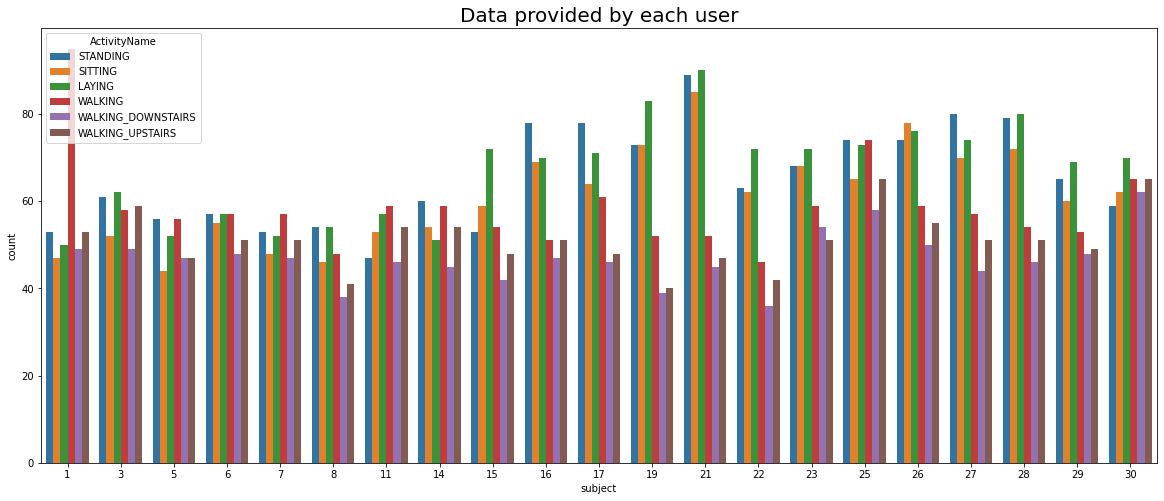

In [10]:
plt.figure(figsize = (20, 8))
plt.title('Data provided by each user', fontsize = 20)
sns.countplot(x = 'subject', hue = 'ActivityName', data = train)
plt.show()

We have got almost same number of reading from all the subjects

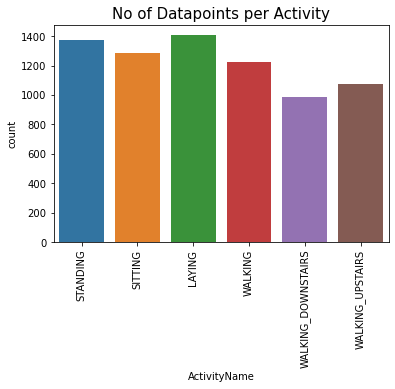

In [11]:
plt.title('No of Datapoints per Activity', fontsize = 15)
sns.countplot(train.ActivityName)
plt.xticks(rotation = 90)
plt.show()

our data is almost well balanced.

## Changing Features 

In [12]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## save this dataframe to csv files

In [13]:
train.to_csv("D:/HAR/trian.csv", index = False)
train.to_csv("D:/HAR/test.csv", index = False)

# EDA

C:\Users\adity\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


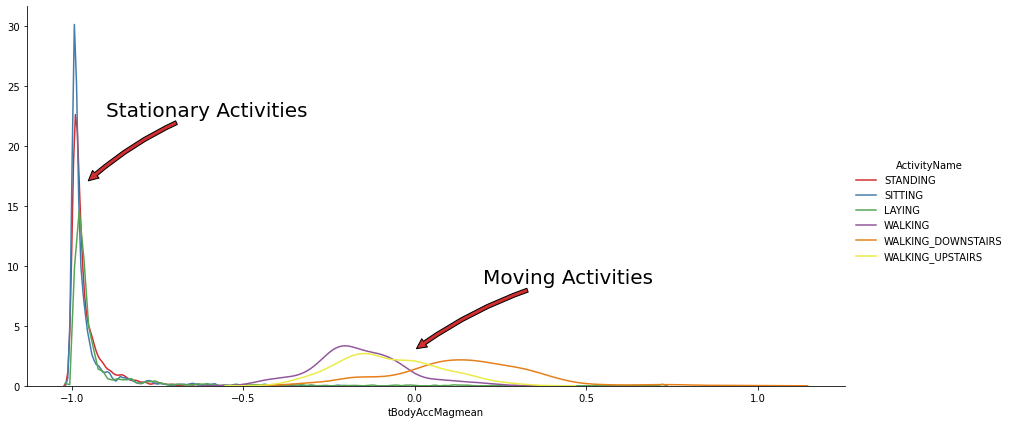

In [14]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

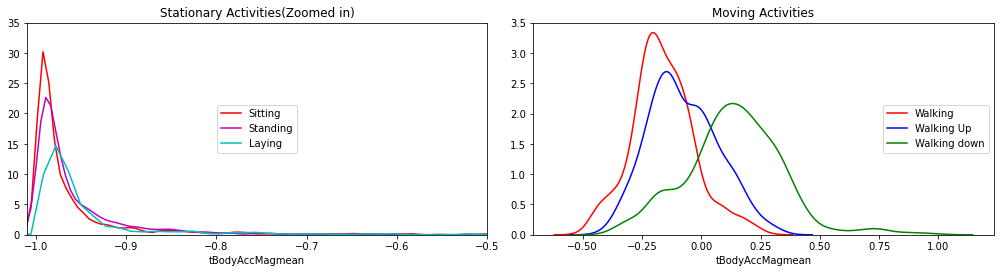

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

## Magnitude of an acceleration can separate it well 

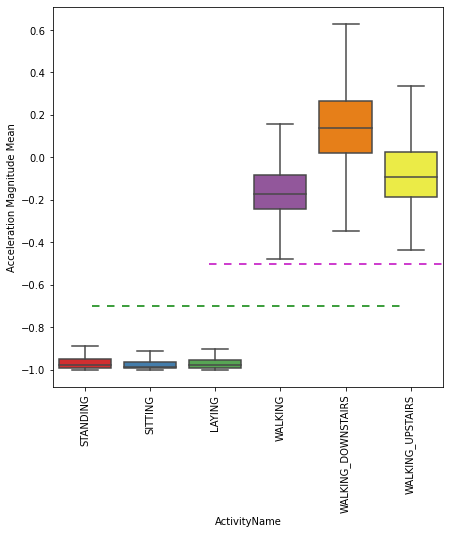

In [16]:
plt.figure(figsize = (7,7))
sns.boxplot(x = 'ActivityName', y = 'tBodyAccMagmean', data  = train, showfliers = False, saturation = 1)
plt.ylabel("Acceleration Magnitude Mean")
plt.axhline(y = -0.7, xmin = 0.1, xmax = 0.9, dashes = (5,5), c = 'g')
plt.axhline(y = -0.5, xmin = 0.4, dashes = (5,5), c = 'm')
plt.xticks(rotation = 90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

## Position of GravityAccelerationComponants

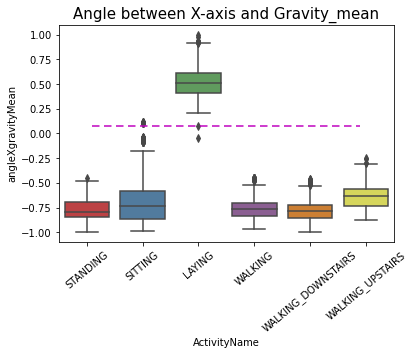

In [17]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

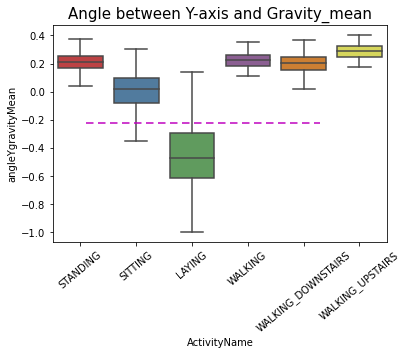

In [18]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

## Apply t-sne on the data

In [19]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.021s...
[t-SNE] Computed neighbors for 7352 samples in 41.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 124.7257996, gradient norm = 0.0302715 (50 iterations in 2.799s)
[t-SNE] Iteration 100: error = 107.3360825, gradient norm = 0.0252955 (50 iterations in

C:\Users\adity\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


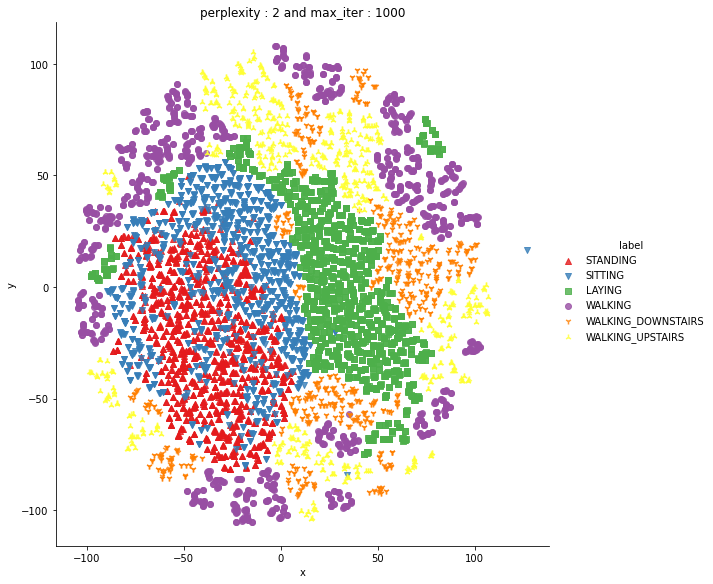

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.956s...
[t-SNE] Computed neighbors for 7352 samples in 41.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.048s
[t-SNE] Iteration 50: error = 114.0362091, gradient norm = 0.0250002 (50 iterations in 1.519s)
[t-SNE] Iteration 100: error = 97.4291153, gradient norm = 0.0168445 (50 iteratio

C:\Users\adity\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


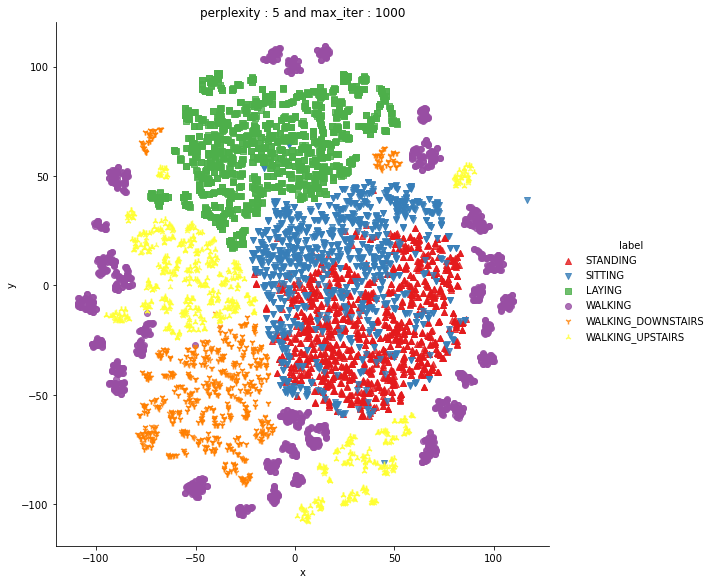

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.923s...
[t-SNE] Computed neighbors for 7352 samples in 43.341s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.098s
[t-SNE] Iteration 50: error = 105.8846970, gradient norm = 0.0170764 (50 iterations in 1.570s)
[t-SNE] Iteration 100: error = 90.2032776, gradient norm = 0.0092757 (50 iterati

C:\Users\adity\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


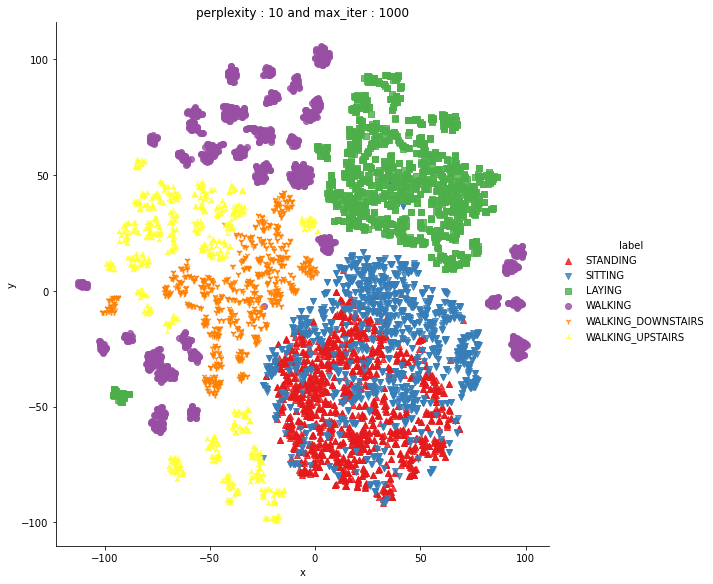

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.914s...
[t-SNE] Computed neighbors for 7352 samples in 43.920s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.183s
[t-SNE] Iteration 50: error = 97.6674805, gradient norm = 0.0158927 (50 iterations in 1.766s)
[t-SNE] Iteration 100: error = 84.0685349, gradient norm = 0.0062472 (50 iteratio

C:\Users\adity\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


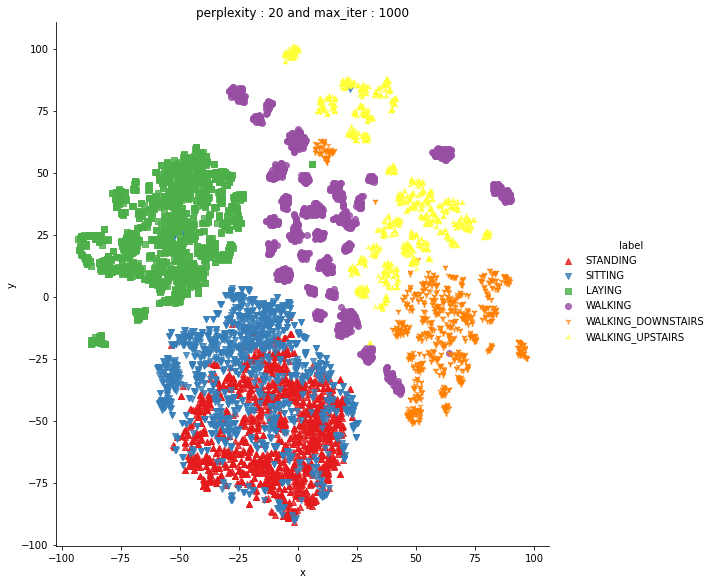

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.126s...
[t-SNE] Computed neighbors for 7352 samples in 43.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.428s
[t-SNE] Iteration 50: error = 86.6316910, gradient norm = 0.0189455 (50 iterations in 2.716s)
[t-SNE] Iteration 100: error = 76.3547516, gradient norm = 0.0048134 (50 iterati

C:\Users\adity\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


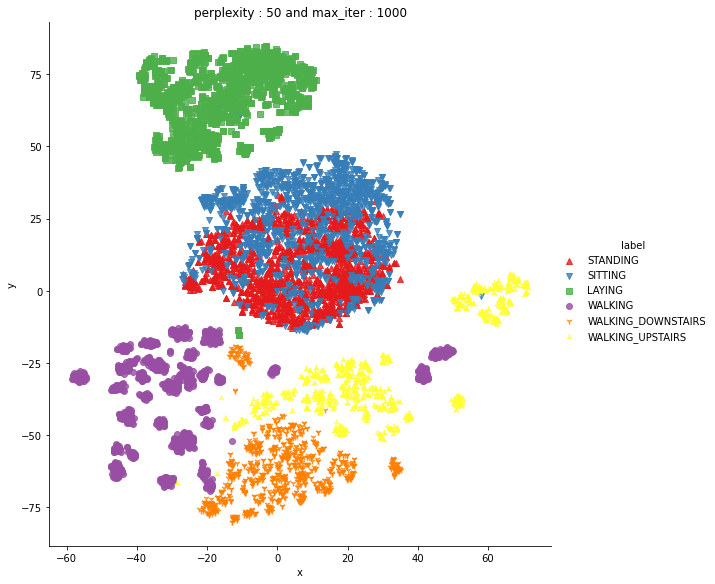

Done


In [21]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])